In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from scipy.stats import zscore


In [124]:
# Se ha modificado el csv externamente sustituyendo las , por . en los datos de gpa
df = pd.read_excel('Admission.xlsx')
df.head()

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,Not admitted,380,3.61,1,0,3,3
1,Admitted,660,3.67,2,0,2,3
2,Admitted,800,4.00,2,0,2,1
3,Admitted,640,3.19,1,1,2,4
4,Not admitted,520,2.93,3,1,2,4


In [125]:
df_objetivo = 'admit'

In [126]:
df[df_objetivo].describe()

count              400
unique               4
top       Not admitted
freq               271
Name: admit, dtype: object

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   admit        400 non-null    object 
 1   gre          400 non-null    int64  
 2   gpa          400 non-null    float64
 3   ses          400 non-null    int64  
 4   Gender_Male  400 non-null    int64  
 5   Race         400 non-null    int64  
 6   rank         400 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 22.0+ KB


In [128]:
df.isnull().sum()

admit          0
gre            0
gpa            0
ses            0
Gender_Male    0
Race           0
rank           0
dtype: int64

In [129]:
df.columns

Index(['admit', 'gre', 'gpa', 'ses', 'Gender_Male', 'Race', 'rank'], dtype='object')

In [130]:
df.shape

(400, 7)

In [131]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

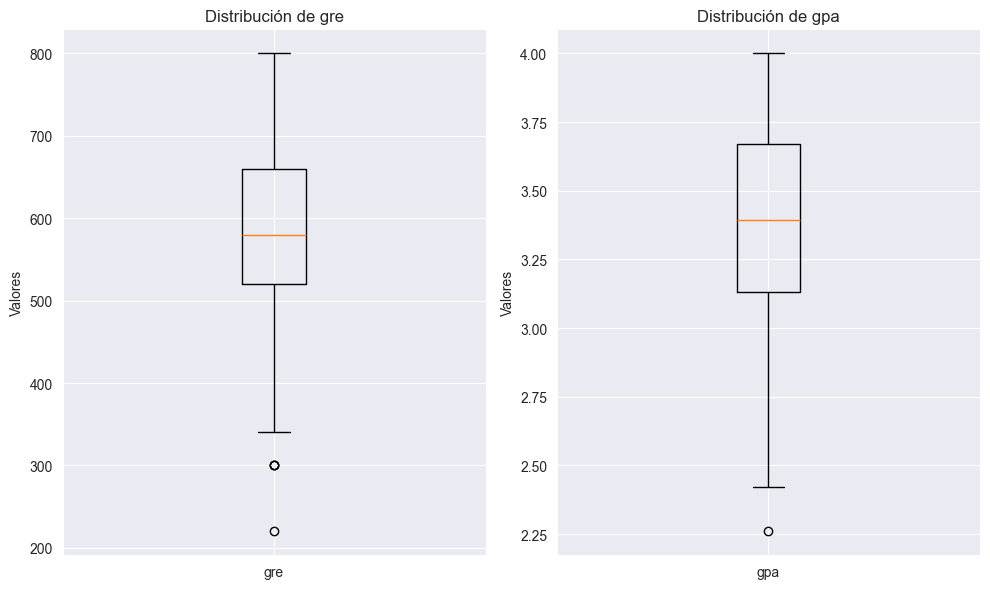

In [132]:
categorias = ['gre','gpa']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes = axes.flatten()
for i, var in enumerate(categorias):
 axes[i].boxplot(df[var], tick_labels=[var])
 axes[i].set_title(f'Distribución de {var}')
 axes[i].set_ylabel('Valores')
for j in range(len(categorias), len(axes)):
 axes[j].axis('off')
plt.tight_layout()
plt.show()

In [133]:
df['admit'].value_counts()

admit
Not admitted    271
Admitted        125
Not admitt        2
Admitt            2
Name: count, dtype: int64

In [134]:
df['admit'] = df['admit'].replace(['Admitt', 'Not admitt'], ['Admitted', 'Not admitted'])
df['admit'] = df['admit'].replace(['Admitted', 'Not admitted'], [1, 0])

C:\Users\ESP\AppData\Local\Temp\ipykernel_512\332171788.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['admit'] = df['admit'].replace(['Admitted', 'Not admitted'], [1, 0])


In [135]:
df['admit'].value_counts()

admit
0    273
1    127
Name: count, dtype: int64

In [136]:
df['Race'].value_counts()

Race
1    143
2    129
3    128
Name: count, dtype: int64

In [137]:
df['rank'].value_counts()

rank
2    151
3    121
4     67
1     61
Name: count, dtype: int64

In [138]:
df['ses'].value_counts()

ses
2    139
1    132
3    129
Name: count, dtype: int64

In [139]:
df.head()

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4


In [122]:
outliers = []
for i in df.values:
 if abs(i - df.mean()) / df.std() > 2:
  outliers.append(i)
print(outliers)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [140]:
# Crear una copia del DataFrame original para no modificarlo directamente
df_cleaned = df.copy()
z_scores = df_cleaned.apply(zscore)
df_cleaned = df_cleaned[(z_scores.abs() <= 2).all(axis=1)]
print(f"Shape original del DataFrame: {df.shape}")
print(f"Shape del DataFrame limpio: {df_cleaned.shape}")

Shape original del DataFrame: (400, 7)
Shape del DataFrame limpio: (383, 7)


In [141]:
df_cleaned.head()

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4


In [142]:
# Separar características (X) y variable objetivo (y)
X = df_cleaned.drop(df_objetivo, axis=1)
y = df_cleaned["admit"]       # Variable objetivo
# Dividimos los datos en un 80% para entrenamiento y un 20% para evaluación (validación + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# De los datos temporales (X_temp, y_temp), dividimos en validación (10%) y test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Entrenar el modelo
rfc = RandomForestClassifier(random_state=42, max_depth=7, min_samples_split=10)
rfc.fit(X_train, y_train)  # Usar X_train y y_train

# Predecir sobre el conjunto de validación
predicciones = rfc.predict(X_val)  # Usar X_val para predicciones

# Calcular el error
error_val = mean_absolute_error(y_val, predicciones)  # Comparar con y_val
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 0.3157894736842105


In [143]:
def train_validation(model):
 model.fit(X_train,y_train.astype(int))
 y_pred = model.predict(X_test)
 conf_matrix = confusion_matrix(y_pred, y_test)
 print(classification_report(y_pred, y_test.astype(int)))
 print('score_test = ', model.score(X_test, y_test.astype(int)))
 print('score_train = ', model.score(X_train, y_train.astype(int)))
 plt.figure(figsize=(6, 4))
 sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
 xticklabels=["no admitido", "admitido"], yticklabels=["no admitido",
 "admitido"])
 plt.title("Matriz de Confusión")
 plt.xlabel("Predicción")
 plt.ylabel("Real")
 plt.show()

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.50      0.83      0.62         6

    accuracy                           0.85        39
   macro avg       0.73      0.84      0.76        39
weighted avg       0.89      0.85      0.86        39

score_test =  0.8461538461538461
score_train =  0.8169934640522876


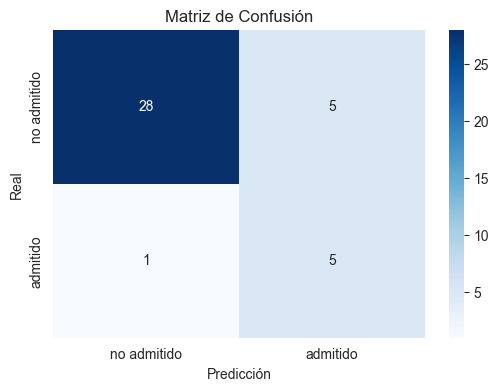

In [144]:
train_validation(rfc)

Hemos obtenido una puntuación f1 del 0.90 para la clase 0 y 0.62 para la clase 1, lo que indica un claro sobreajuste del modelo frente a los datos presentes

Por lo tanto el modelo no podría ser usado por la presencia del overfitting que hemos comentado anteriormente